# Iris Flower Species Clustering using K-Means 

#### In this dataset, i use the iris dataset to apply the kMeans clustering algorithm to group iris flowers into clusters based on  features. The iris dataset contains samples of three species of iris flowers (Setosa, Versicolor and Virginica), each with four features( Sepal lenthg, Sepal width, Petal lenth, Petal withd).  
#### I use similar K-Means to cluster similar flowers together based on these features

 ### Import necessary library

In [37]:
import numpy as np # for numerical computing 
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
from sklearn.cluster import KMeans # for kmeans cluster
from sklearn.preprocessing import StandardScaler # for data preprocessing
import plotly.express as px # for advanced data visulaization
import joblib # for model saving
# import warnings
# warnings.simplefilter(action = 'ignore')

### Loading in the dataset into dataframe

In [40]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Python_data\iris - dataset - assignment.csv")
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
21,5.1,3.7,1.5,0.4,0
58,6.6,2.9,4.6,1.3,1
48,5.3,3.7,1.5,0.2,0
54,6.5,2.8,4.6,1.5,1


### inspecting the dataset

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### KMeans clustering

In [48]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [49]:
# select column we want to use for clustering 
# i want to use 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

X=df.drop('target', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
## standardize the dataset using StandardScaler
scaler = StandardScaler()
X_s=scaler.fit_transform(X)

In [51]:
column =X.columns
column

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [52]:
X_scaled=pd.DataFrame(X_s, columns=column)
X_scaled.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,-1.385353,0.328414,-1.397064,-1.315444


In [53]:
# Create kmeans object with a desired number of clusters
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=42)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

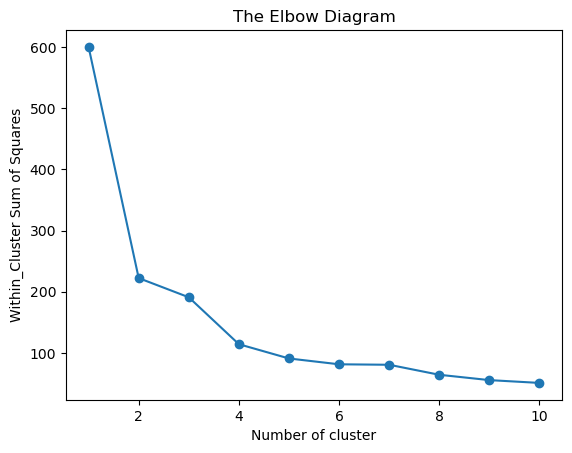

In [54]:
# Initialize an empty list of wcss values for each number of clusters
wcss=[]

# loop through different numbers of clusters and calculate wcss for each

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot the wcss values against the number clusters
x= range(1, 11)
y=wcss
plt.plot(x, y, marker='o')
plt.title('The Elbow Diagram')
plt.xlabel('Number of cluster')
plt.ylabel('Within_Cluster Sum of Squares')
plt.show;

#### The optimal number is 3

### Training the model

In [57]:
optimalcluster=3

In [58]:
X=df.drop('target', axis=1)

In [59]:
## standardize the dataset using StandardScaler
scaler = StandardScaler()
X_s=scaler.fit_transform(X)

In [60]:
column =X.columns
X_scaled=pd.DataFrame(X_s, columns=column)
X_scaled.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
37,-1.143017,1.249201,-1.340227,-1.447076


In [172]:
# Create kmeans object with a optimalcluster
model = KMeans(n_clusters=optimalcluster, init='k-means++', random_state=42)
y_kmeans=model.fit_predict(X_scaled)

y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
X_scaled['K_means Predict Cluster']=y_kmeans
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,K_means Predict Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2,2
2,-1.385353,0.328414,-1.397064,-1.315444,2,2
3,-1.506521,0.098217,-1.283389,-1.315444,2,2
4,-1.021849,1.249201,-1.340227,-1.315444,1,1


In [186]:
fig=px.scatter_3d(
    y_kmeans,
    x=X_scaled['petal width (cm)'],
    y=X_scaled['sepal width (cm)'],
    z=X_scaled['sepal length (cm)'],
    color=X_scaled['K_means Predict Cluster'],
    title="3D Scatter Plot of Clustered Data",
    labels={ 
        "x": "Petal Width (cm)",
        "y": "Sepal Width (cm)",
        "z": "Sepal Length (cm)",
        "color": "Cluster" },
    width=700, 
    height=600)
fig.show();

#### our data is now divided into clusters

In [65]:
model.predict([[5.7, 10.2, 1.3, 0.5]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([1])

this shows that length with the variables entered  above would likely fall into cluster 1

### Save the model

In [68]:
joblib.dump(model, "Iris Flower Species" )

['Iris Flower Species']

In [102]:
# to load the save model
MODEL = joblib.load( "Iris Flower Species" )

In [132]:
MODEL.predict([[0.9, 10.5, 10.9, 0.7]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([0])